# 天池二手车交易价格预测
## 读取数据


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# 数据加载
train_data = pd.read_csv('./used_car_train_20200313.csv', sep=' ')
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [3]:
test = pd.read_csv("./used_car_testB_20200421.csv", sep = ' ')
test

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


## 数据探索

In [4]:
# 查看数据缺失值
temp = train_data.isnull().sum()
#temp = pd.DataFrame(temp)
#temp = temp.reset_index()
#temp[temp[0]>0]
temp = temp[temp>0]
temp

model          1
bodyType    4506
fuelType    8680
gearbox     5981
dtype: int64

<AxesSubplot:>

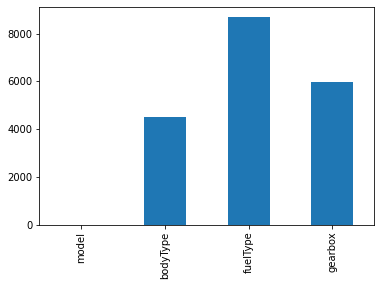

In [5]:
temp.plot.bar()

In [6]:
# model, bodyType, fuelType, gearbox 存在缺失值
train_data['SaleID'].nunique()
train_data.shape

(150000, 31)

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

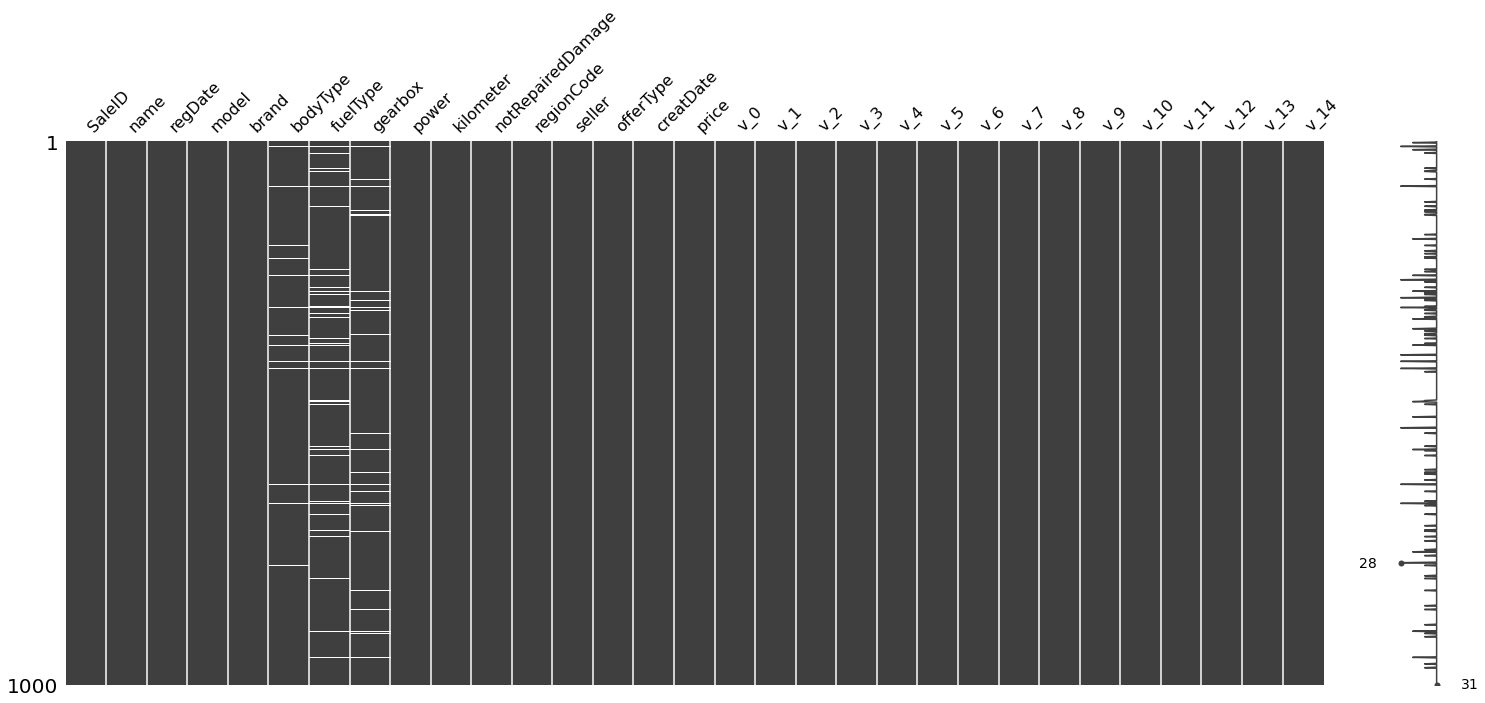

In [7]:
plt.figure(figsize=(12, 8))
sample = train_data.sample(1000)
msno.matrix(sample)

<AxesSubplot:>

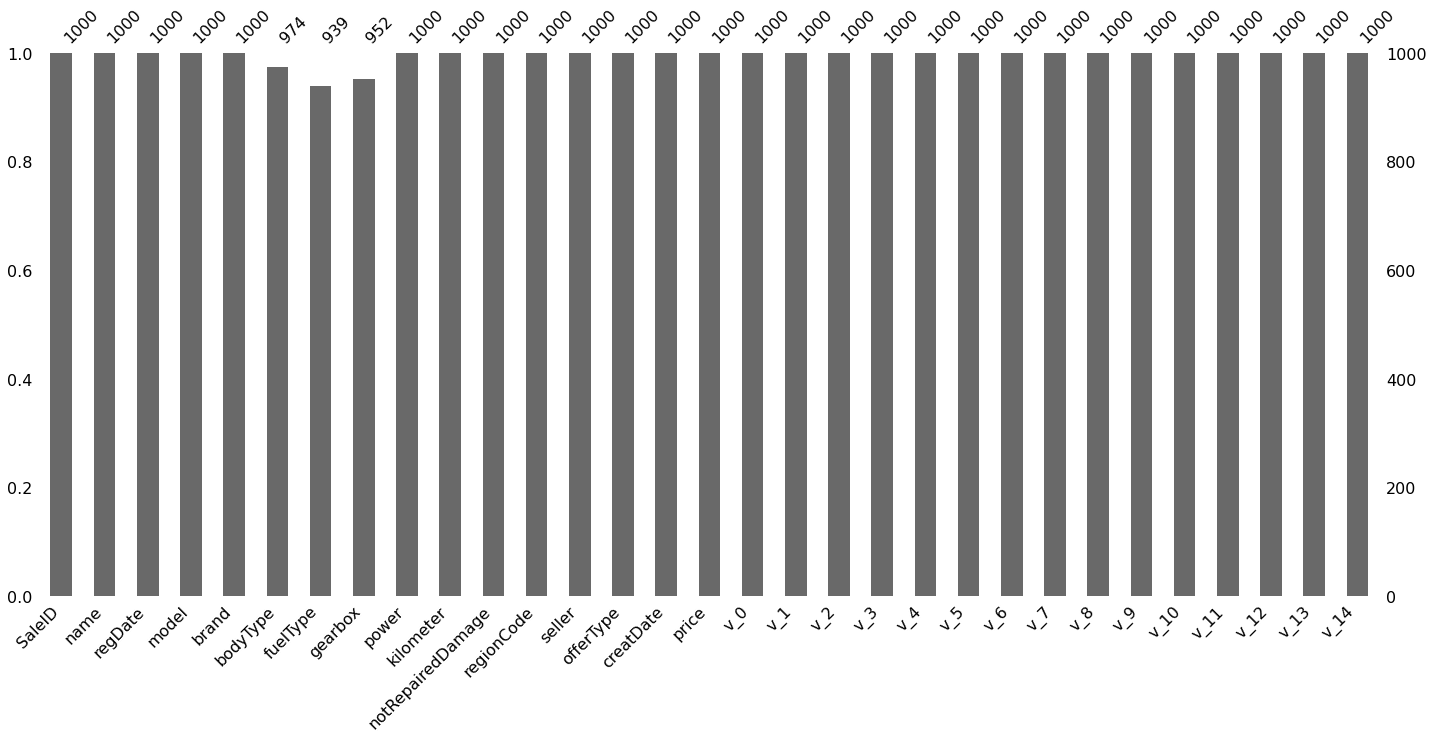

In [8]:
msno.bar(sample)

<AxesSubplot:>

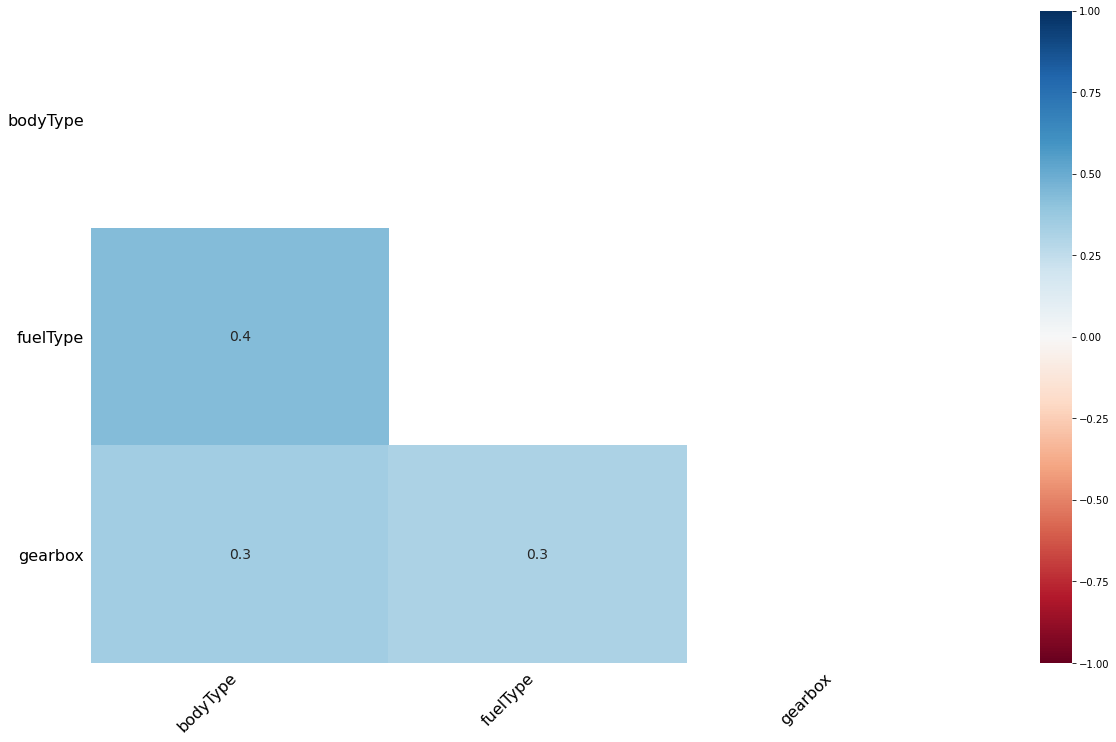

In [9]:
msno.heatmap(sample)

In [10]:
# 查看数据集的大小
print('训练集大小:', train_data.shape)
print('测试集大小:', test.shape)

训练集大小: (150000, 31)
测试集大小: (50000, 30)


In [11]:
import seaborn as sns
import scipy.stats as st
import numpy as np

C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'johnsonsu'}, xlabel='price'>

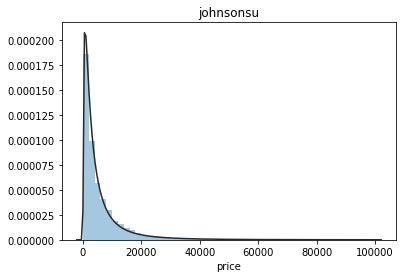

In [12]:
y = train_data['price']
plt.title('johnsonsu')
sns.distplot(y, kde=False, fit=st.johnsonsu)

C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='price'>

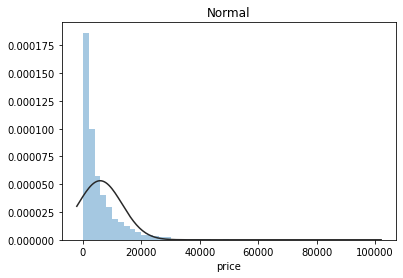

In [13]:
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

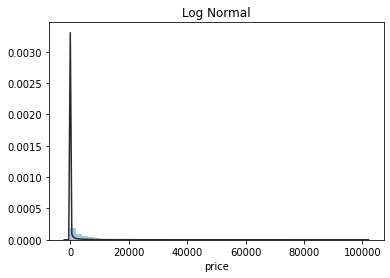

In [14]:
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

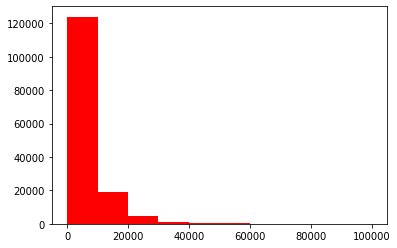

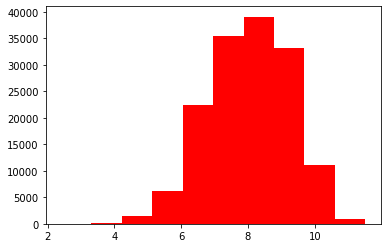

In [15]:
plt.hist(train_data['price'], color ='red')
plt.show()
plt.hist(np.log(train_data['price']), color ='red')
plt.show()

C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.346487
Kurtosis: 18.995183


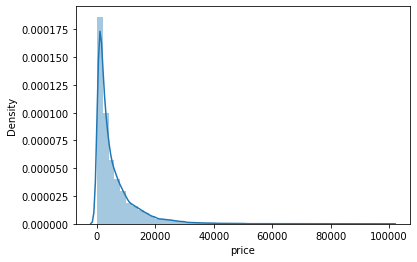

In [16]:
sns.distplot(train_data['price'])
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

<AxesSubplot:>

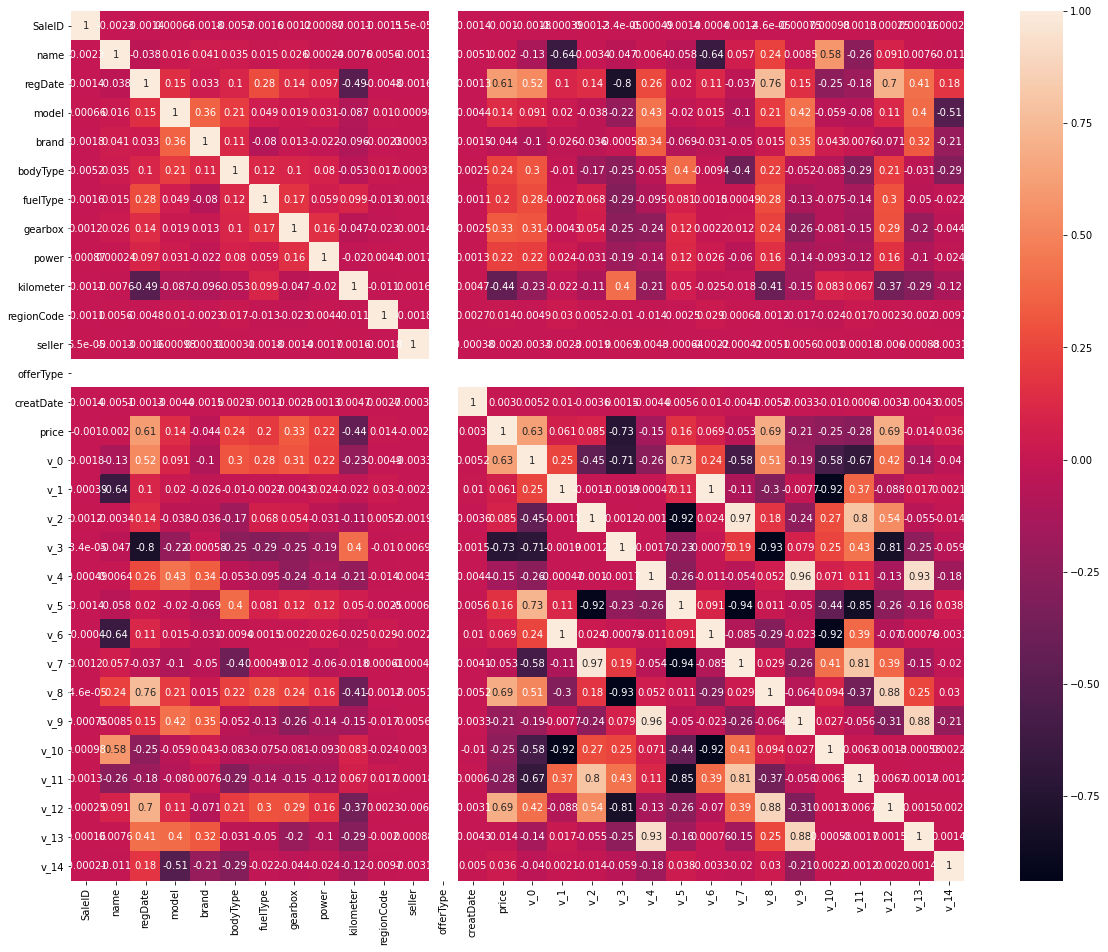

In [17]:
plt.figure(figsize=(20, 16))
sns.heatmap(train_data.corr(), annot=True)

In [18]:
temp = train_data.corr()
temp[np.abs(temp['price'])>=0.5]['price']

regDate    0.611959
price      1.000000
v_0        0.628397
v_3       -0.730946
v_8        0.685798
v_12       0.692823
Name: price, dtype: float64

In [19]:
# 可以去掉 offerType
#train_data.info()
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [ ]:
# 一行代码生成数据报告
import pandas_profiling as pp
report = pp.ProfileReport(train_data)

In [20]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [21]:
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [22]:
test['notRepairedDamage'].value_counts()
test['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [23]:
# 对power异常值进行处理
# 缺失值用-1补全
train_data = train_data.fillna(-1)
test = test.fillna(-1)

In [24]:
# 查看数值类型
#train_data.info()
numerical_cols = train_data.select_dtypes(exclude='object').columns
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [25]:
# 查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['notRepairedDamage'], dtype='object')

## 特征工程

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# 特征选择
drop_cols = ['SaleID', 'regDate', 'creatDate', 'offerType', 'price']
feature_cols = [col for col in train_data.columns if col not in drop_cols]
feature_cols

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'regionCode',
 'seller',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [28]:
# 提取特征列
X_data = train_data[feature_cols]
Y_data = train_data['price']
X_test = test[feature_cols]

In [29]:
# 定一个统计函数，用于统计某字段的特征
def show_stats(data):
    print('min: ', np.min(data))
    print('max: ', np.max(data))
    # ptp = max - min
    print('ptp: ', np.ptp(data))
    print('mean: ', np.mean(data))
    print('std: ', np.std(data))
    print('var: ', np.var(data))

In [30]:
show_stats(Y_data)

min:  11
max:  99999
ptp:  99988
mean:  5923.327333333334
std:  7501.973469876635
var:  56279605.942732885


In [31]:
#X_data.info()
X_data['notRepairedDamage'] = X_data['notRepairedDamage'].astype('float64')
X_test['notRepairedDamage'] = X_test['notRepairedDamage'].astype('float64')

In [32]:
X_data.to_csv('./pre_data/X_data.csv', sep=',', index=False)
X_test.to_csv('./pre_data/X_test.csv', sep=',', index=False)

In [33]:
Y_data.to_csv('./pre_data/Y_data.csv', sep=',', index=False)

## 构造模型

In [34]:
import xgboost as xgb

**xgb+全量数据**(591)

In [55]:
# 创建模型1
'''
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0,
                         subsample=0.8, colsample_bytree=0.8, max_depth=7,
                         random_state=2021)
'''
model = xgb.XGBRegressor(max_depth=6, learning_rate=0.05, n_estimators=2000,
                         objective='reg:linear', tree_method='gpu_hist',
                         subsample=0.8, colsample_bytree=0.8,
                         min_child_samples=3, eval_metric='auc', reg_lambda=0.5)

model.fit(X_data, Y_data)

[14:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
             gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_samples=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [56]:
y_pred = model.predict(X_test)
y_pred

array([1349.7438, 1807.3142, 8208.248 , ..., 5971.0728, 5007.055 ,
       5541.272 ], dtype=float32)

In [57]:
# 训练 欠拟合 => n_estimators太小，或者 learning_rate太小
show_stats(y_pred)

min:  -2214.7563
max:  89297.03
ptp:  91511.79
mean:  5911.9814
std:  7374.9116
var:  54389324.0


In [58]:
# 因为XGBoost是集成学习，多棵树组成
# 有些树的叶子节点 有可能为负
result = pd.DataFrame()
result['SaleID'] = test['SaleID']
result['price'] = y_pred
result[result['price'] < 0] = 11
result

,SaleID,price
0,200000,1349.743774
1,200001,1807.314209
2,200002,8208.248047
3,200003,1233.641968
4,200004,2001.644897
...,...,...
49995,249995,6487.697266
49996,249996,19031.294922
49997,249997,5971.072754
49998,249998,5007.055176


In [44]:
submit = pd.read_csv("./used_car_sample_submit.csv", sep = ',')

In [59]:
result['SaleID'] = submit['SaleID']

In [60]:
result

,SaleID,price
0,150000,1349.743774
1,150001,1807.314209
2,150002,8208.248047
3,150003,1233.641968
4,150004,2001.644897
...,...,...
49995,199995,6487.697266
49996,199996,19031.294922
49997,199997,5971.072754
49998,199998,5007.055176


In [61]:
result.to_csv('./submission/baseline_xgb_all.csv', index=False)

**xgb+全量数据+正则**(561)

In [47]:
model = xgb.XGBRegressor(max_depth=6, 
                         learning_rate=0.05, 
                         n_estimators=35000,
                         objective='reg:linear',
                         subsample=0.8, 
                         colsample_bytree=0.8,
                         min_child_samples=3, 
                         eval_metric='mae',
                         #reg_lambda=1, # 防止过拟合的参数
                         #alpha=0.3, # 防止过拟合的参数        
                        )

In [48]:
# 模型训练 
model.fit(X_data, Y_data,eval_metric='mae')  

[22:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='mae',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_samples=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=35000, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
sub_id = submit['SaleID']

In [51]:
# 预测
Y_pred = model.predict(X_test)

In [52]:
# 生成对应格式的DF
sub = pd.DataFrame(Y_pred, columns=['price'])
sub.insert(0,'SaleID',sub_id)

In [54]:
# 保存csv
sub.to_csv('./submission/xgb_full_reg.csv',index=False)

sub

,SaleID,price
0,150000,1354.552856
1,150001,1767.681885
2,150002,8637.861328
3,150003,1020.400391
4,150004,2041.752441
...,...,...
49995,199995,6677.366211
49996,199996,18939.589844
49997,199997,5989.454590
49998,199998,4632.843262
